<a href="https://colab.research.google.com/github/Guhan2348519/ADVANCED-ML-tasks/blob/main/2348519_lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def unit_step(x):
    return np.where(x >= 0, 1, 0)
def sign(x):
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))

def linear(x):
    return x

def piecewise_linear(x):
    return np.piecewise(x, [x < 0, (x >= 0) & (x <= 2), x > 2], [lambda x: 0, lambda x: 0.5 * x, lambda x: x - 1])

def logistic(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

In [3]:
x_values = np.linspace(5, 10, 100)

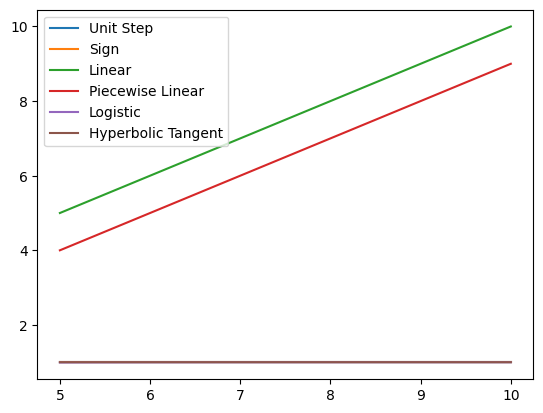

In [19]:
y_unit_step = unit_step(x_values)
y_sign = sign(x_values)
# Apply activation functions
y_linear = linear(x_values)
y_piecewise_linear = piecewise_linear(x_values)
y_logistic = logistic(x_values)
y_tanh = tanh(x_values)

# Plot all functions on the same graph
plt.plot(x_values, y_unit_step, label='Unit Step')
plt.plot(x_values, y_sign, label='Sign')
plt.plot(x_values, y_linear, label='Linear')
plt.plot(x_values, y_piecewise_linear, label='Piecewise Linear')
plt.plot(x_values, y_logistic, label='Logistic')
plt.plot(x_values, y_tanh, label='Hyperbolic Tangent')

plt.legend()
plt.show()

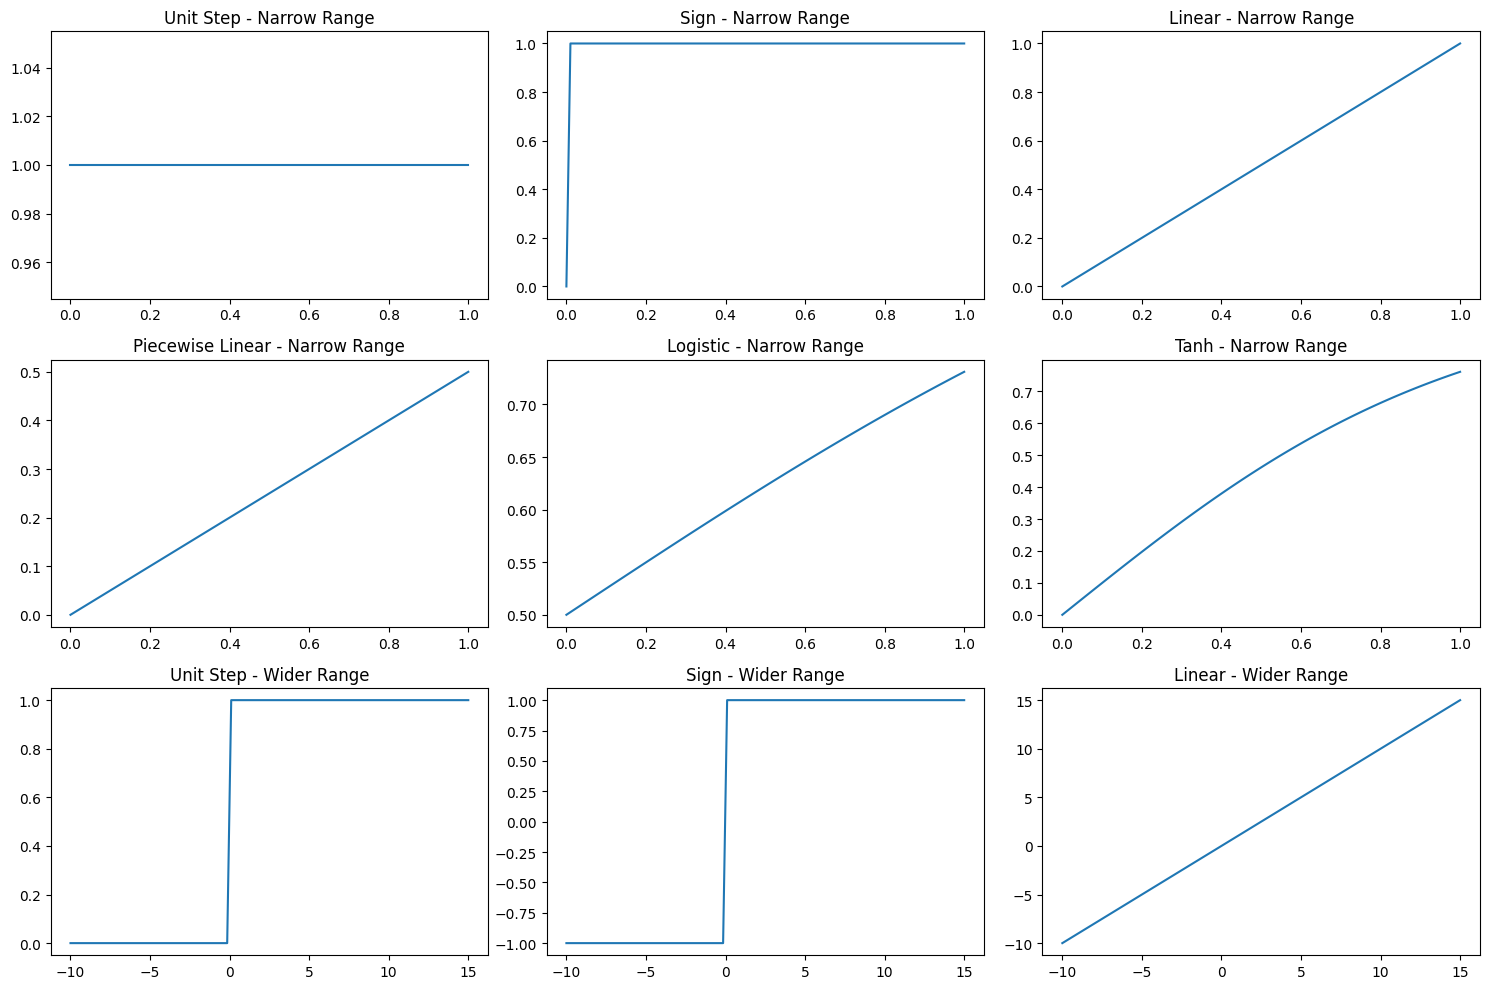

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Activation function definitions
def unit_step(x):
    return np.where(x >= 0, 1, 0)

def sign(x):
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))

def linear(x):
    return x

def piecewise_linear(x):
    return np.where(x < 0, 0,   # Apply first condition element-wise
                    np.where(x < 2, 0.5 * x,  # Second condition
                             x - 1))  # Third condition (else)

def logistic(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# Explore different value ranges (you can change these lines)
range_1 = np.linspace(0, 1, 100)  # Narrower range
range_2 = np.linspace(-10, 15, 100)  # Wider range
range_3 = np.linspace(-5, 10, 100)  # Asymmetric range

# Apply activation functions to different ranges
y_unit_step_1 = unit_step(range_1)
y_sign_1 = sign(range_1)
y_linear_1 = linear(range_1)
y_piecewise_linear_1 = piecewise_linear(range_1)
y_logistic_1 = logistic(range_1)
y_tanh_1 = tanh(range_1)

y_unit_step_2 = unit_step(range_2)
y_sign_2 = sign(range_2)
y_linear_2 = linear(range_2)
y_piecewise_linear_2 = piecewise_linear(range_2)
y_logistic_2 = logistic(range_2)
y_tanh_2 = tanh(range_2)

y_unit_step_3 = unit_step(range_3)
y_sign_3 = sign(range_3)
y_linear_3 = linear(range_3)
y_piecewise_linear_3 = piecewise_linear(range_3)
y_logistic_3 = logistic(range_3)
y_tanh_3 = tanh(range_3)

# Plot all functions for each range
plt.figure(figsize=(15, 10))

# Narrow range plot
plt.subplot(3, 3, 1, title="Unit Step - Narrow Range")
plt.plot(range_1, y_unit_step_1)
plt.subplot(3, 3, 2, title="Sign - Narrow Range")
plt.plot(range_1, y_sign_1)
plt.subplot(3, 3, 3, title="Linear - Narrow Range")
plt.plot(range_1, y_linear_1)
plt.subplot(3, 3, 4, title="Piecewise Linear - Narrow Range")
plt.plot(range_1, y_piecewise_linear_1)
plt.subplot(3, 3, 5, title="Logistic - Narrow Range")
plt.plot(range_1, y_logistic_1)
plt.subplot(3, 3, 6, title="Tanh - Narrow Range")
plt.plot(range_1, y_tanh_1)

# Wider range plot
plt.subplot(3, 3, 7, title="Unit Step - Wider Range")
plt.plot(range_2, y_unit_step_2)
plt.subplot(3, 3, 8, title="Sign - Wider Range")
plt.plot(range_2, y_sign_2)
plt.subplot(3, 3, 9, title="Linear - Wider Range")
plt.plot(range_2, y_linear_2)

# Adjust layout and show plots
plt.tight_layout()
plt.show()

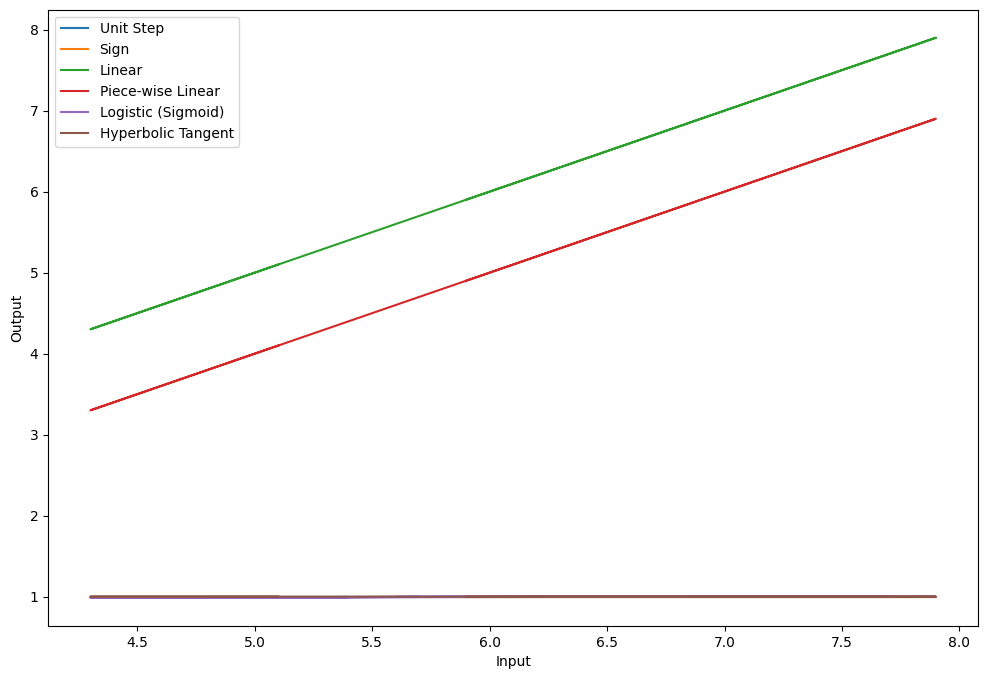

In [15]:

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# Load Iris dataset
iris = datasets.load_iris()
input_values = iris.data[:, 0]

# Apply activation functions and plot
plt.figure(figsize=(12, 8))

plt.plot(input_values, unit_step(input_values), label='Unit Step')
plt.plot(input_values, sign(input_values), label='Sign')
plt.plot(input_values, linear(input_values), label='Linear')
plt.plot(input_values, piecewise_linear(input_values), label='Piece-wise Linear')
plt.plot(input_values, logistic(input_values), label='Logistic (Sigmoid)')
plt.plot(input_values, tanh(input_values), label='Hyperbolic Tangent')

plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

In [16]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Preprocess data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Evaluate performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

Epoch 1/50
4/4 [==============================] - 1s 81ms/step - loss: 1.1901 - accuracy: 0.3333 - val_loss: 1.1843 - val_accuracy: 0.3667
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 1.1164 - accuracy: 0.4250 - val_loss: 1.1089 - val_accuracy: 0.4333
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 1.0494 - accuracy: 0.4833 - val_loss: 1.0388 - val_accuracy: 0.5667
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 0.9889 - accuracy: 0.5500 - val_loss: 0.9739 - val_accuracy: 0.5667
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 0.9336 - accuracy: 0.5917 - val_loss: 0.9146 - val_accuracy: 0.6000
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 0.8843 - accuracy: 0.6167 - val_loss: 0.8599 - val_accuracy: 0.6667
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 0.8365 - accuracy: 0.6667 - val_loss: 0.8110 - val_accuracy: 0.7667
Epoch 8/50
4/4 [===========

In [17]:

def perceptron(x1, x2, w1, w2, w0):
    z = w1 * x1 + w2 * x2 + w0
    return unit_step(z)

w1 = -0.5
w2 = -0.243
w0 = 0.2

# AND operation
print("AND:", perceptron(1, 1, w1, w2, w0))  # Output: 1
print("AND:", perceptron(0, 1, w1, w2, w0))  # Output: 0

# OR operation
w1 = 0.5
w2 = 0.243
w0 = -0.2
print("OR:", perceptron(0, 0, w1, w2, w0))  # Output: 0
print("OR:", perceptron(1, 0, w1, w2, w0))  # Output: 1

AND: 0
AND: 0
OR: 0
OR: 1


In [18]:
import tensorflow as tf
import numpy as np

# XOR input and output data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Define MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=5000, verbose=0)

# Evaluate performance
predictions = model.predict(X)
rounded_predictions = np.round(predictions)

print("XOR Truth Table:")
print("Input | Predicted Output")
print("------------------------")
for i in range(len(X)):
    print(f"{X[i]} | {rounded_predictions[i][0]}")

1/1 [==============================] - 0s 145ms/step
XOR Truth Table:
Input | Predicted Output
------------------------
[0. 0.] | 0.0
[0. 1.] | 1.0
[1. 0.] | 1.0
[1. 1.] | 0.0
